In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import ActivationType, Comparator, Constraint, PDEModel, System

## High Order Polynomial
$$y = x^5 + x^4 + x^3 - 2x^2 -2x + 1$$

In [2]:
poly_approx = PDEModel("polynomial_approximator", {"num_epochs": 2000})
poly_approx.set_state(["x"], {"x": [-1., 1.]})
poly_approx.add_endog("y", {
    "hidden_units": [40, 40],
})
poly_approx.add_endog_equation(r"$y=x^5 + x^4 + x^3 - 2 * x^2 -2 * x + 1$", label="base_func")
print(poly_approx)
if not os.path.exists("./models/poly_approx.pt"):
    poly_approx.train_model("./models", "poly_approx.pt", True)
    poly_approx.eval_model(True)
else:
    poly_approx.load_model(torch.load("./models/poly_approx.pt"))
    poly_approx.eval_model(True)

====================Summary of Model polynomial_approximator====================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-1.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): Tanh()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameters: 1761
--------------------------------------------------------------------------------

========================Endog

Total loss: 0.0006: 100%|██████████| 2000/2000 [00:14<00:00, 138.42it/s]

training finished, total time :: 14.462841033935547
Model saved to ./models/poly_approx.pt
===================================Evaluating===================================
loss :: endogeq_base_func: 0.0003,
total_loss: 0.0003


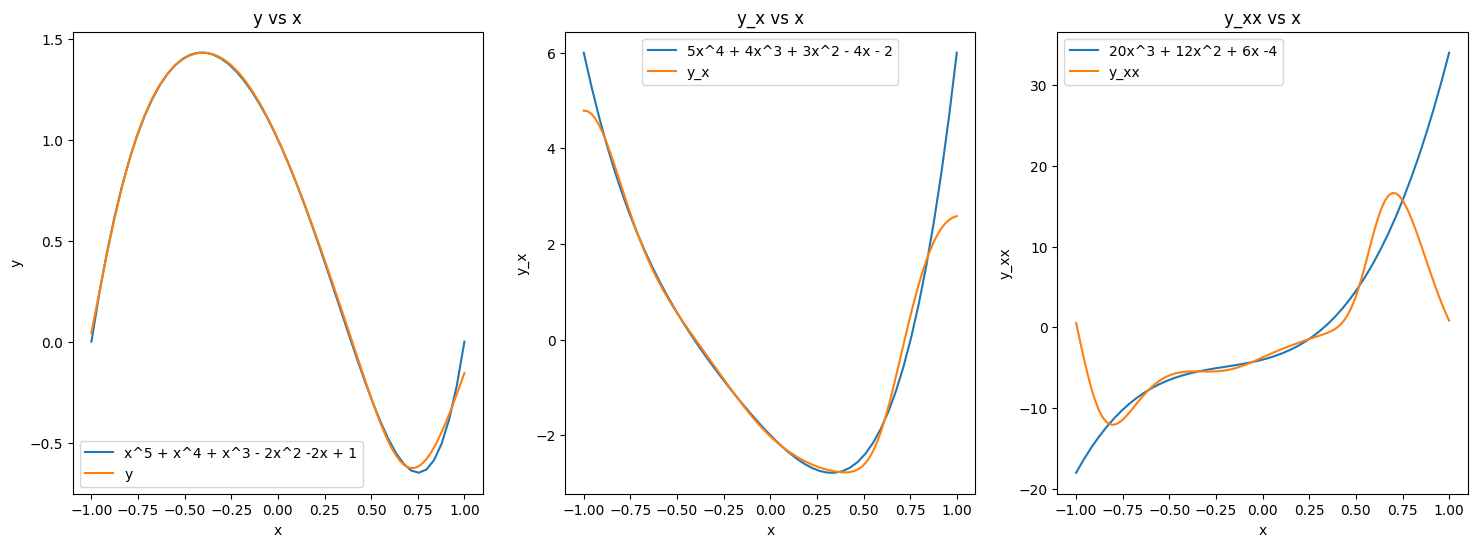

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-1, 1)
ax[0].plot(x, x**5+x**4+x**3-2*x**2-2*x+1, label="x^5 + x^4 + x^3 - 2x^2 -2x + 1")
ax[1].plot(x, 5*x**4+4*x**3+3*x**2-4*x-2, label="5x^4 + 4x^3 + 3x^2 - 4x - 2")
ax[2].plot(x, 20*x**3+12*x**2+6*x-4, label="20x^3 + 12x^2 + 6x -4")
poly_approx.endog_vars["y"].plot("y", {"x": [-1, 1]}, ax=ax[0])
poly_approx.endog_vars["y"].plot("y_x", {"x": [-1, 1]}, ax=ax[1])
poly_approx.endog_vars["y"].plot("y_xx", {"x": [-1, 1]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Exponential Function 
$$y=(1+2x)e^{-2x}$$

This is the function that the ODE version is not able to solve properly

In [4]:
exp_approx = PDEModel("exp_approximator", {"num_epochs": 2000})
exp_approx.set_state(["x"], {"x": [-1., 1.]})
exp_approx.add_endog("y", {
    "hidden_units": [40, 40],
})
exp_approx.add_endog_equation(r"$y=(1+2*x)*e^{-2*x}$", label="base_func")
print(exp_approx)
if not os.path.exists("./models/exp_approx.pt"):
    exp_approx.train_model("./models", "exp_approx.pt", True)
    exp_approx.eval_model(True)
else:
    exp_approx.load_model(torch.load("./models/exp_approx.pt"))
    exp_approx.eval_model(True)

=======================Summary of Model exp_approximator========================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-1.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): Tanh()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameters: 1761
--------------------------------------------------------------------------------

========================Endog

Total loss: 0.0010: 100%|██████████| 2000/2000 [00:13<00:00, 148.26it/s]

training finished, total time :: 13.497893333435059
Model saved to ./models/exp_approx.pt
===================================Evaluating===================================
loss :: endogeq_base_func: 0.0002,
total_loss: 0.0002


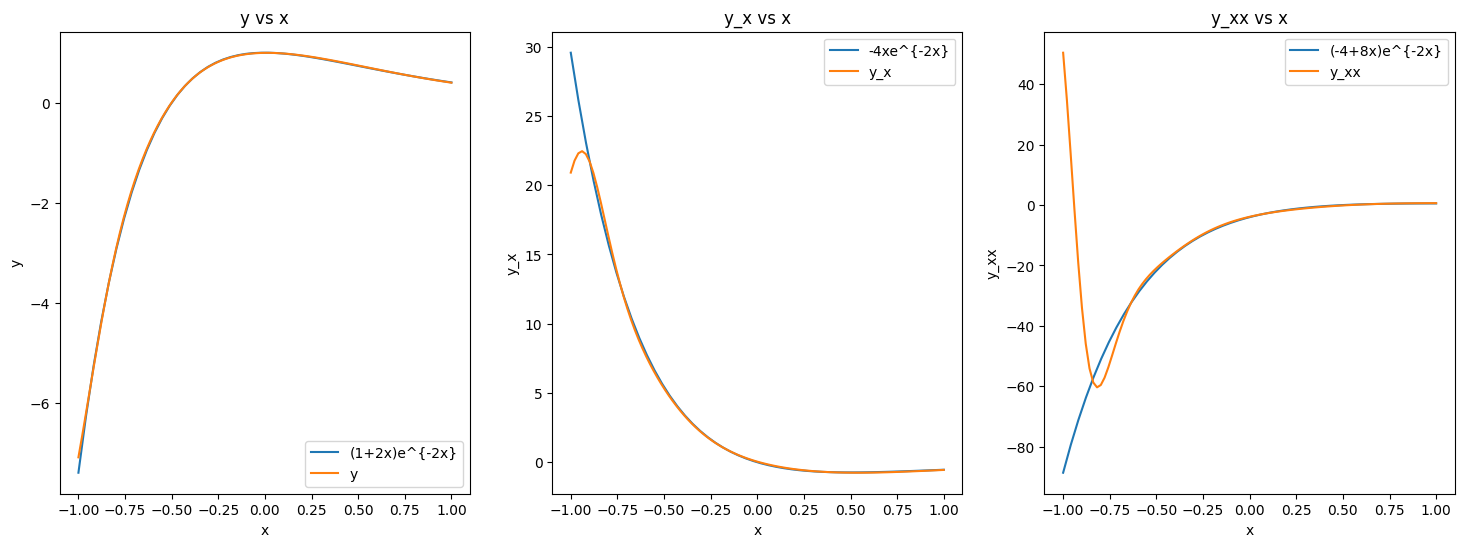

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-1, 1)
ax[0].plot(x, (1 + 2 * x) * np.exp(-2*x), label="(1+2x)e^{-2x}")
ax[1].plot(x, -4 * x * np.exp(-2*x), label="-4xe^{-2x}")
ax[2].plot(x, (-4 + 8 * x) * np.exp(-2*x), label="(-4+8x)e^{-2x}")
exp_approx.endog_vars["y"].plot("y", {"x": [-1, 1]}, ax=ax[0])
exp_approx.endog_vars["y"].plot("y_x", {"x": [-1, 1]}, ax=ax[1])
exp_approx.endog_vars["y"].plot("y_xx", {"x": [-1, 1]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Discontinuous Function
$$y=\begin{cases} x+1, x<0 \\ x^2, x\geq 0 \end{cases}$$

In [6]:
discont_approx = PDEModel("discontinuous_approximator", {"num_epochs": 10000})
discont_approx.set_state(["x"], {"x": [-3., 3.]})
discont_approx.add_endog("y", {
    "hidden_units": [40, 40],
})
neg_sys = System([Constraint("x", Comparator.LT, "0", label="neg_const")], label="neg_sys")
neg_sys.add_endog_equation("y=x+1")
pos_sys = System([Constraint("x", Comparator.GEQ, "0", label="pos_const")], label="pos_sys")
pos_sys.add_endog_equation("y=x**2")
discont_approx.add_system(neg_sys)
discont_approx.add_system(pos_sys)
print(discont_approx)
if not os.path.exists("./models/discont_approx.pt"):
    discont_approx.train_model("./models", "discont_approx.pt", True)
    discont_approx.eval_model(True)
else:
    discont_approx.load_model(torch.load("./models/discont_approx.pt"))
    discont_approx.eval_model(True)

==================Summary of Model discontinuous_approximator===================
Config: {
 "batch_size": 100,
 "num_epochs": 10000,
 "lr": 0.001
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-3.0, 3.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): Tanh()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameters: 1761
--------------------------------------------------------------------------------

========================Endo

Total loss: 0.0001: 100%|██████████| 10000/10000 [01:02<00:00, 158.89it/s]

training finished, total time :: 62.94636154174805
Model saved to ./models/discont_approx.pt
===================================Evaluating===================================
loss :: system_neg_sys: 0.0000,
system_pos_sys: 0.0001,
total_loss: 0.0001


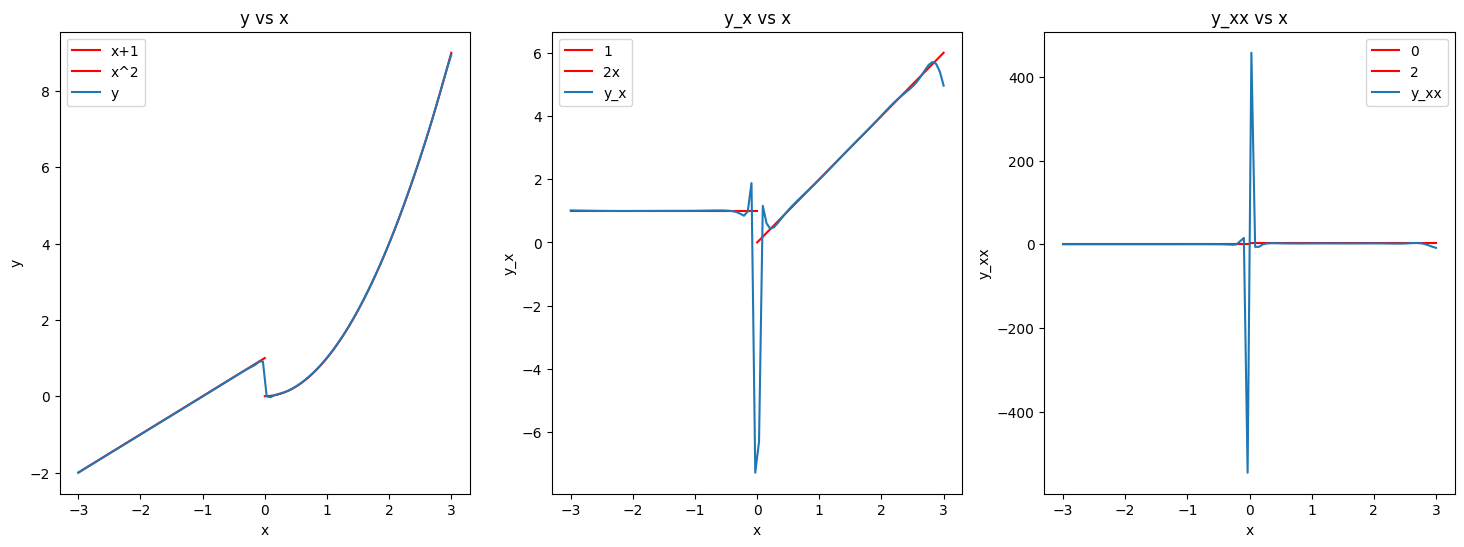

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-3, 3)
x_neg = np.linspace(-3, 0)
x_pos = np.linspace(0, 3)
ax[0].plot(x_neg, x_neg + 1, label="x+1", color="red")
ax[0].plot(x_pos, x_pos**2, label="x^2", color="red")
ax[1].plot(x_neg, np.ones_like(x_neg), label="1", color="red")
ax[1].plot(x_pos, 2*x_pos, label="2x", color="red")
ax[2].plot(x_neg, np.zeros_like(x_neg), label="0", color="red")
ax[2].plot(x_pos, 2*np.ones_like(x_pos), label="2", color="red")
discont_approx.endog_vars["y"].plot("y", {"x": [-3, 3]}, ax=ax[0])
discont_approx.endog_vars["y"].plot("y_x", {"x": [-3, 3]}, ax=ax[1])
discont_approx.endog_vars["y"].plot("y_xx", {"x": [-3, 3]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Discontinuous and Oscillating Function
$$y=\begin{cases} 5 + \sum_{k=1}^4 \sin(kx), x<0 \\ \cos(10x), x\geq 0 \end{cases}$$

This is an example function in https://arxiv.org/pdf/2406.02917

In [8]:
discont_approx2 = PDEModel("discontinuous_approximator", {"num_epochs": 20000})
discont_approx2.set_state(["x"], {"x": [-3., 3.]})
discont_approx2.add_endog("y", {
    "hidden_units": [40, 40],
    "activation_type": ActivationType.ReLU,
})
neg_sys = System([Constraint("x", Comparator.LT, "0", label="neg_const")], label="neg_sys")
neg_sys.add_endog_equation("y=5+sin(x)+sin(2*x)+sin(3*x)+sin(4*x)")
pos_sys = System([Constraint("x", Comparator.GEQ, "0", label="pos_const")], label="pos_sys")
pos_sys.add_endog_equation("y=cos(10*x)")
discont_approx2.add_system(neg_sys)
discont_approx2.add_system(pos_sys)
print(discont_approx2)
if not os.path.exists("./models/discont_approx2.pt"):
    discont_approx2.train_model("./models", "discont_approx2.pt", True)
    discont_approx2.eval_model(True)
else:
    discont_approx2.load_model(torch.load("./models/discont_approx2.pt"))
    discont_approx2.eval_model(True)

==================Summary of Model discontinuous_approximator===================
Config: {
 "batch_size": 100,
 "num_epochs": 20000,
 "lr": 0.001
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-3.0, 3.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): ReLU()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): ReLU()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameters: 1761
--------------------------------------------------------------------------------

========================Endo

  0%|          | 0/20000 [00:00<?, ?it/s]

Total loss: 0.3037: 100%|██████████| 20000/20000 [01:21<00:00, 244.41it/s]

training finished, total time :: 81.83840084075928
Model saved to ./models/discont_approx2.pt
===================================Evaluating===================================
loss :: system_neg_sys: 0.0124,
system_pos_sys: 0.2096,
total_loss: 0.2220


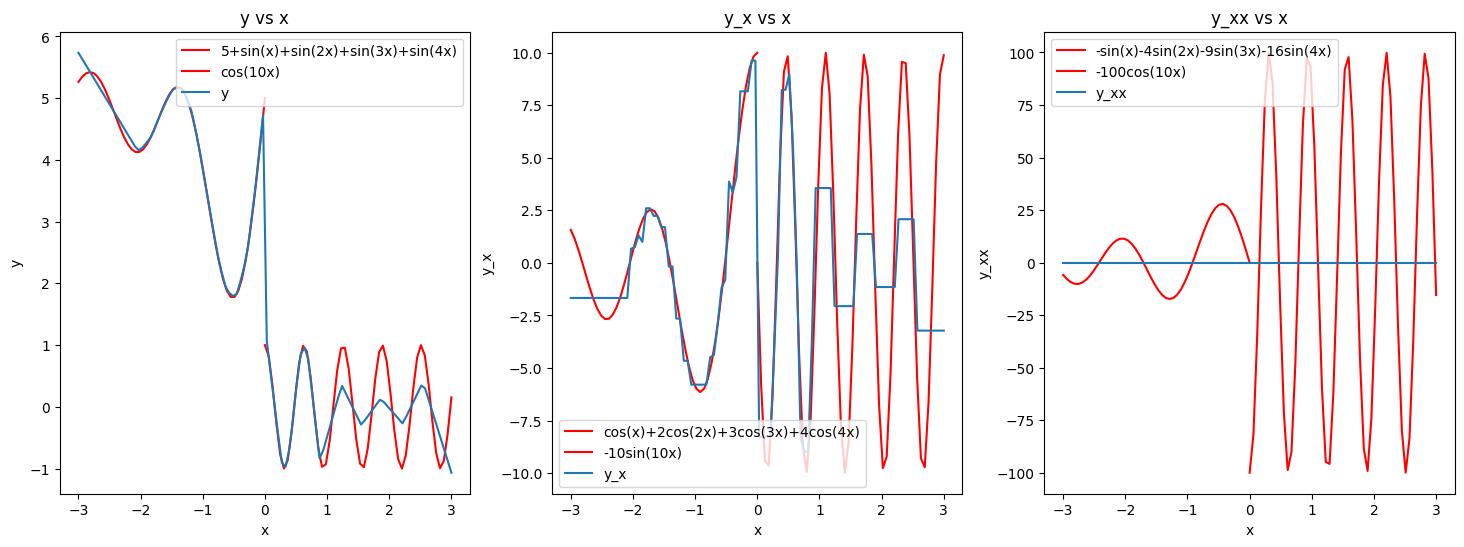

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-3, 3)
x_neg = np.linspace(-3, 0)
x_pos = np.linspace(0, 3)
ax[0].plot(x_neg, 5+np.sin(x_neg)+np.sin(2*x_neg)+np.sin(3*x_neg)+np.sin(4*x_neg), label="5+sin(x)+sin(2x)+sin(3x)+sin(4x)", color="red")
ax[0].plot(x_pos, np.cos(10*x_pos), label="cos(10x)", color="red")
ax[1].plot(x_neg, np.cos(x_neg)+2*np.cos(2*x_neg)+3*np.cos(3*x_neg)+4*np.cos(4*x_neg), label="cos(x)+2cos(2x)+3cos(3x)+4cos(4x)", color="red")
ax[1].plot(x_pos, -10*np.sin(10*x_pos), label="-10sin(10x)", color="red")
ax[2].plot(x_neg, -np.sin(x_neg)-4*np.sin(2*x_neg)-9*np.sin(3*x_neg)-16*np.sin(4*x_neg), label="-sin(x)-4sin(2x)-9sin(3x)-16sin(4x)", color="red")
ax[2].plot(x_pos, -100*np.cos(10*x_pos), label="-100cos(10x)", color="red")
discont_approx2.endog_vars["y"].plot("y", {"x": [-3, 3]}, ax=ax[0])
discont_approx2.endog_vars["y"].plot("y_x", {"x": [-3, 3]}, ax=ax[1])
discont_approx2.endog_vars["y"].plot("y_xx", {"x": [-3, 3]}, ax=ax[2])
plt.subplots_adjust()
plt.show()